In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_fraud.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [5]:
df.duplicated().value_counts()

False    5320
True     1177
Name: count, dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df['quality'].value_counts()

quality
Legit    5084
Fraud     236
Name: count, dtype: int64

In [13]:
df['type'].value_counts()

type
white    3961
red      1359
Name: count, dtype: int64

In [14]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']

In [20]:
print('Percentage of fraud in Red Wines :', np.round(100*len(reds[reds['quality']=='Fraud'])/len(reds), 2))

Percentage of fraud in Red Wines : 4.64


In [21]:
print('Percentage of fraud in White Wines :', np.round(100*len(whites[whites['quality']=='Fraud'])/len(whites), 2))

Percentage of fraud in White Wines : 4.37


In [22]:
df['Fraud'] = df['quality'].map({
    'Legit' : 0,
    'Fraud' : 1
})

<Axes: >

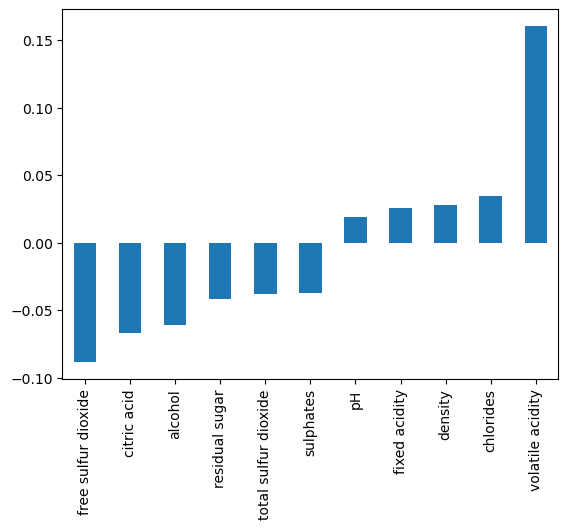

In [27]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

In [30]:
#Converting 'type' column from a string or 'red' or 'white' to dummy variables

df['type'] = pd.get_dummies(df['type'], drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,False,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,False,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,False,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Legit,False,0


In [31]:
df = df.drop('Fraud',axis=1)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,False


In [32]:
X = df.drop('quality',axis=1)
y = df['quality']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [35]:
#scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC(class_weight='balanced')

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'C':[0.0001,0.001,0.01,0.1,0.5,0.9,1],
             'gamma':['scale','auto']}

In [40]:
grid = GridSearchCV(svc,param_grid)

In [41]:
grid.fit(sc_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'gamma': ['scale', 'auto']})

In [42]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [44]:
grid_pred = grid.predict(sc_X_test)


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
confusion_matrix(y_test,grid_pred)

array([[ 11,   8],
       [ 87, 426]])

In [47]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.11      0.58      0.19        19
       Legit       0.98      0.83      0.90       513

    accuracy                           0.82       532
   macro avg       0.55      0.70      0.54       532
weighted avg       0.95      0.82      0.87       532

